In [46]:
## Capstone project using titanic dataset

### Import the necessary libraries

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [49]:
path ="/content/drive/MyDrive/ml_bootcamp/train.csv"
cData = pd.read_csv(path)
titanic = cData.copy()

## A quick summary of the data columns

*   List item
*   List item




In [50]:
cData.shape

(891, 12)

In [51]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
cData.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

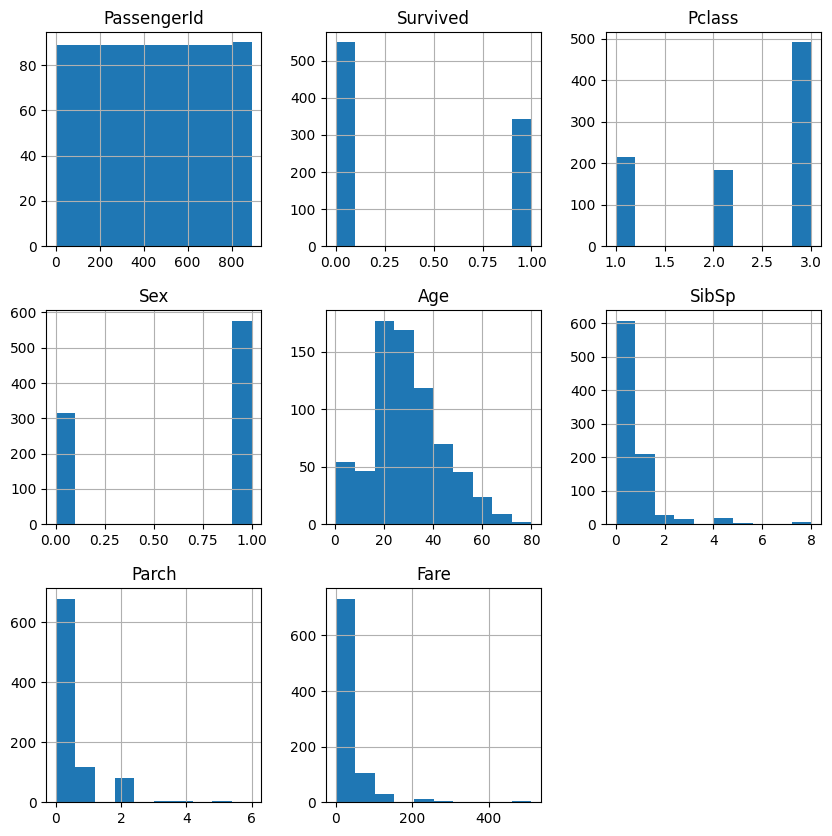

In [53]:
# Exploratory Data Analysis
# convert categorical data to numerical data


titanic['Sex'] = titanic['Sex'].astype('category').cat.codes

#titanic['Embarked'] = titanic['Embarked'].astype('category').cat.codes

titanic.hist(figsize=(10,10));
plt.show()


In [54]:
# To check which values where converted to what categories
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# % Embarked survived
titanic.groupby(['Embarked', 'Survived'])['Survived'].value_counts()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

People embarked at port S have lower chances of survival, embarked can be considered as a feature of interest

In [56]:
# % Embarked Pclass
titanic.groupby(['Pclass', 'Survived'])['Survived'].value_counts()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

Class1 (Upper Class) has higher survival rate than Class2 & Class3

In [57]:
titanic.groupby(['Sex', 'Survived'])['Survived'].value_counts()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: count, dtype: int64

Females have a higher survival rate than males

<Axes: xlabel='Age', ylabel='Survived'>

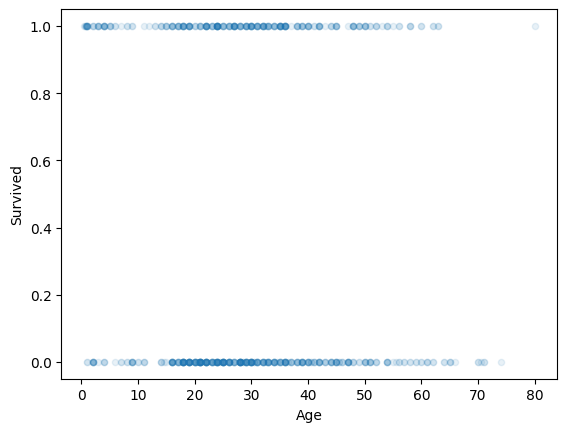

In [58]:
titanic.plot(kind='scatter', x='Age', y='Survived', alpha=0.1)


There is not much visible impact of age on survival chances until one is above 60. After 60 the chances of survival decrease

## Data cleaning

In [59]:
# Replacing the categorical var with actual values
cData['Pclass'] = cData['Pclass'].replace({1: 'Upper', 2: 'Middle', 3: 'Lower'})
cData = pd.get_dummies(cData, columns=['Sex'])
cData = pd.get_dummies(cData, columns=['Pclass'])
cData = pd.get_dummies(cData, columns=['Embarked'])
#cData['Survived'] = cData['Survived'].replace({0: 'Dead', 1: 'Survived'})
#cData = pd.get_dummies(cData, columns=['Survived'])
cData.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,True,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,False,True,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,True,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,True,False,False,False,False,True


## Feature Engineering

In [60]:
#dropping/ignoring name, PassengerId, Ticket, Fare, Cabin as they are not a feature (they will not impact the model)
#axis{0 or ‘index’, 1 or ‘columns’}, default 0
#Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
cData = cData.drop('PassengerId', axis=1)
cData = cData.drop('Name', axis=1)
cData = cData.drop('Ticket', axis=1)
cData = cData.drop('Fare', axis=1)
cData = cData.drop('Cabin', axis=1)
# Dropping embarked Columns to see if accuracy is improved
#cData = cData.drop('Embarked_C', axis=1)
#cData = cData.drop('Embarked_Q', axis=1)
#cData = cData.drop('Embarked_S', axis=1)
cData.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,False,True,True,False,False,False,False,True
1,1,38.0,1,0,True,False,False,False,True,True,False,False
2,1,26.0,0,0,True,False,True,False,False,False,False,True
3,1,35.0,1,0,True,False,False,False,True,False,False,True
4,0,35.0,0,0,False,True,True,False,False,False,False,True


In [61]:
cData.describe()

,Survived,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594
std,0.486592,14.526497,1.102743,0.806057
min,0.000000,0.420000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000


In [62]:
# find the mode of Age
cData['Age'].mode()

,Age
0,24.0


In [63]:
# Replace missing age values with mode
#cData['Age'] = cData['Age'].fillna(cData['Age'].mode()[0])
#cData.describe()

# Remove all rows with null value for age
cData = cData.dropna(subset=['Age'])
cData.describe()

,Survived,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,29.699118,0.512605,0.431373
std,0.491460,14.526497,0.929783,0.853289
min,0.000000,0.420000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,1.000000
max,1.000000,80.000000,5.000000,6.000000


In [64]:
# find the missing or NaN values for each coulmn in the dataframe
cData.isnull().sum()


,0
Survived,0
Age,0
SibSp,0
Parch,0
Sex_female,0
Sex_male,0
Pclass_Lower,0
Pclass_Middle,0
Pclass_Upper,0
Embarked_C,0


In [65]:
# Double check if there are any null values

cData.isnull().values.any()

False

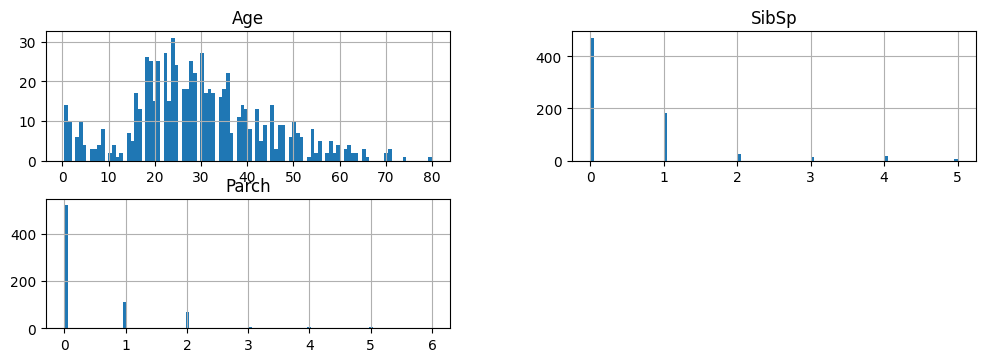

In [66]:
# Histogram of all coulmns except the first one which is y

columns = list(cData)[1:11] # Excluding Outcome column which has only
cData[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));


In [67]:
# Correlation in data
cData.corr() # It will show correlation matrix


,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.077221,-0.017358,0.093317,0.538826,-0.538826,-0.337587,0.084753,0.301831,0.193607,-0.049549,-0.164235
Age,-0.077221,1.000000,-0.308247,-0.189119,-0.093254,0.093254,-0.312271,0.006954,0.348941,0.036261,-0.022405,-0.032523
SibSp,-0.017358,-0.308247,1.000000,0.383820,0.103950,-0.103950,0.078461,-0.051647,-0.038962,-0.045462,0.051619,0.021751
Parch,0.093317,-0.189119,0.383820,1.000000,0.246972,-0.246972,0.029115,-0.017739,-0.015850,-0.008846,-0.009126,0.015833
Sex_female,0.538826,-0.093254,0.103950,0.246972,1.000000,-1.000000,-0.161520,0.073036,0.112699,0.101580,0.026440,-0.115167
Sex_male,-0.538826,0.093254,-0.103950,-0.246972,-1.000000,1.000000,0.161520,-0.073036,-0.112699,-0.101580,-0.026440,0.115167
Pclass_Lower,-0.337587,-0.312271,0.078461,0.029115,-0.161520,0.161520,1.000000,-0.562330,-0.590210,-0.171566,0.145442,0.097755
Pclass_Middle,0.084753,0.006954,-0.051647,-0.017739,0.073036,-0.073036,-0.562330,1.000000,-0.335632,-0.139748,-0.080567,0.170636
Pclass_Upper,0.301831,0.348941,-0.038962,-0.015850,0.112699,-0.112699,-0.590210,-0.335632,1.000000,0.331867,-0.087032,-0.277938
Embarked_C,0.193607,0.036261,-0.045462,-0.008846,0.101580,-0.101580,-0.171566,-0.139748,0.331867,1.000000,-0.095320,-0.877931


### Correlation between features

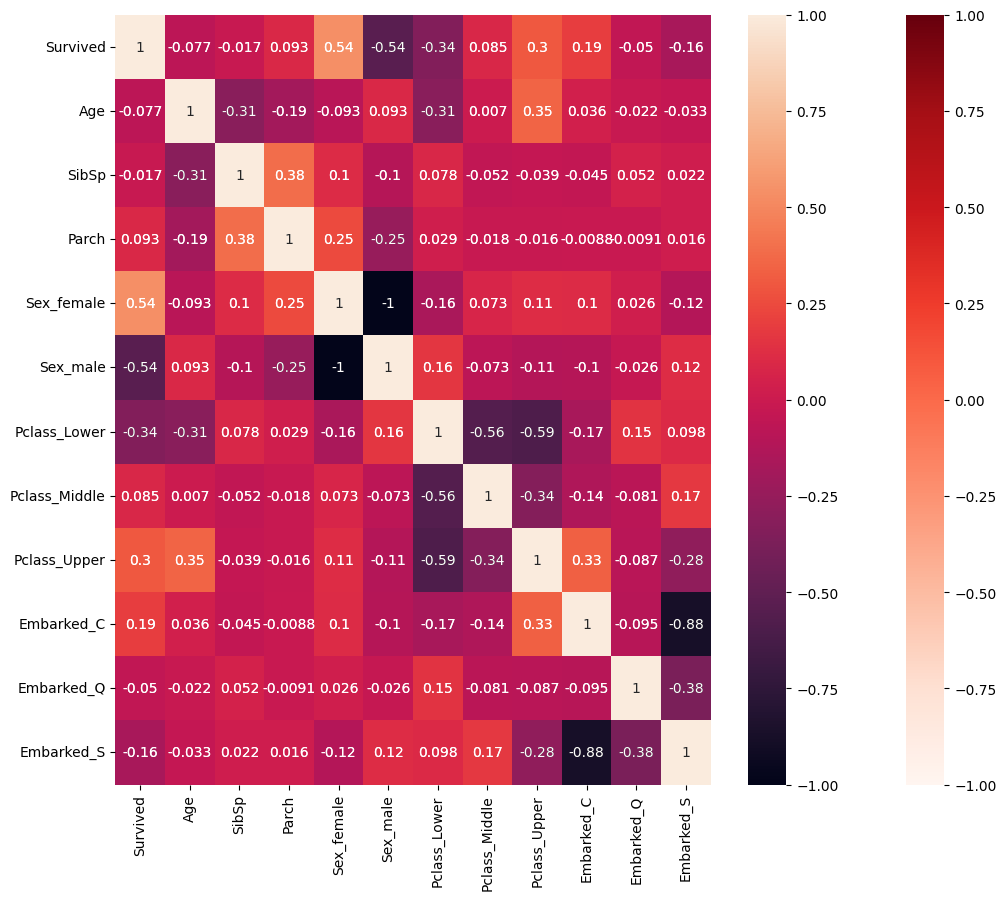

In [68]:
# Creating a correlation heatmap to better visualize correlation in the data
# Lighter the color, more positive correlation
# Darker the color, more negative correlation

plt.figure(figsize=(12,10))
cor = cData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.heatmap(cData.corr(), annot=True)
plt.savefig("test.png")

Sex of the passenger seems to have a strong correlation with Survival

In [69]:
# what if age is dropped, will there be any impact on model accuracy ??
# Removing age decreases the model accuracy
# cData = cData.drop('Age',axis=1)

In [70]:
# Starting with Logistic Regression as this is a classification problem

X = cData.drop('Survived',axis=1)     # Predictor feature columns (8 X m)
Y = cData['Survived']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()


,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
641,24.0,0,0,True,False,False,False,True,True,False,False
433,17.0,0,0,False,True,True,False,False,False,False,True
202,34.0,0,0,False,True,True,False,False,False,False,True
585,18.0,0,2,True,False,False,False,True,False,False,True
544,50.0,1,0,False,True,False,False,True,True,False,False


In [71]:
x_train.describe()

,Age,SibSp,Parch
count,499.000000,499.000000,499.000000
mean,29.862064,0.478958,0.448898
std,14.581332,0.883277,0.884320
min,0.420000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,80.000000,5.000000,6.000000


In [72]:
x_test.describe()

,Age,SibSp,Parch
count,215.00000,215.000000,215.000000
mean,29.32093,0.590698,0.390698
std,14.42516,1.027613,0.776950
min,0.67000,0.000000,0.000000
25%,20.00000,0.000000,0.000000
50%,28.50000,0.000000,0.000000
75%,36.00000,1.000000,1.000000
max,74.00000,5.000000,5.000000


## ML Models

### Logistic Regression

In [73]:
# Applying Logistic Regression base model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.7813953488372093


<Axes: >

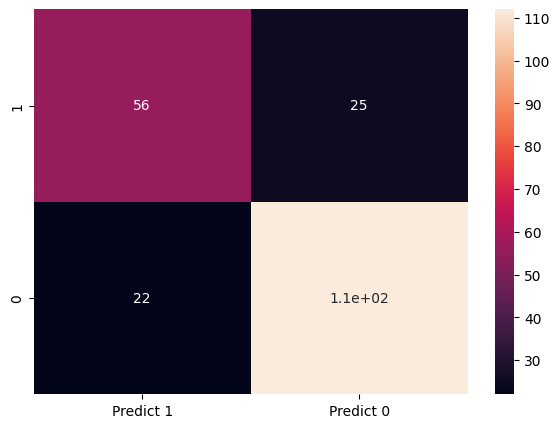

In [74]:
y_predict = model.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [75]:
# Finetuning Logistic Regression hyperparameters using Grid search CV

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(LogisticRegression(max_iter=1000, solver='liblinear', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
Best Score: 0.7876363636363637


In [76]:
# Hyper-parameter finetuning of Logistic Regression model post GridsearchCV

model = LogisticRegression(max_iter=10000, solver='liblinear', tol=0.01, C=10, penalty='l2')
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.7906976744186046


### Decision Tree

In [77]:
# Applying Decision Tree base model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None) # Fixed typo: DescisionTreeClassifier to DecisionTreeClassifier
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.7813953488372093


<Axes: >

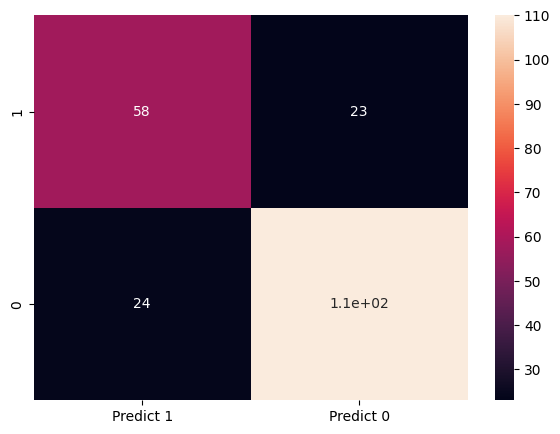

In [78]:
y_predict = model.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [79]:
# Hyper parameter finetuning for Decision Tree using GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [80]:
# Applying recommended hyper parameter values to get the optimized model score

model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5) # Fixed typo: DescisionTreeClassifier to DecisionTreeClassifier
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.8372093023255814


<Axes: >

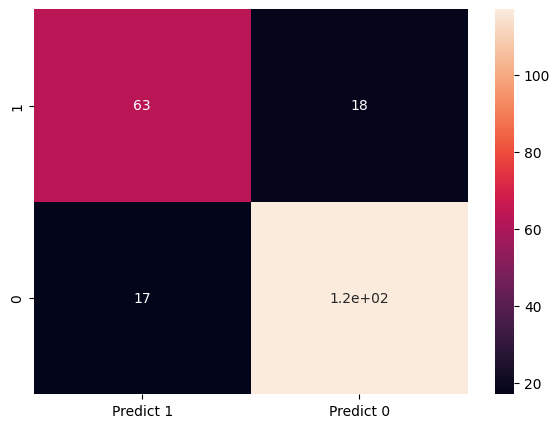

In [81]:
# Confusion Matrix after applying recommended hyper parameter value

y_predict = model.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Ensemble - Random Forest

In [82]:
# Applying Random Forest base model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.786046511627907


In [83]:
# Hyper parameter finetuning for Randon Forest using GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [84]:
# Applying recommended hyper parameter values to get the optimized model score

model = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10, n_estimators=100)  # Using RandomForestClassifier instead
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.8232558139534883


<Axes: >

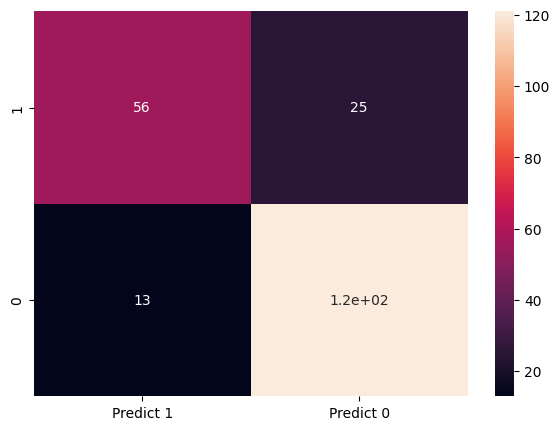

In [85]:
# Confusion Matrix after applying recommended hyper parameter value

y_predict = model.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### SVM

In [86]:
# Applying SVM (support vector model) base model
from sklearn.svm import SVC

#Build the model
model = SVC(kernel="rbf", gamma=0.5, C=1.0)
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.8


In [87]:
# Hyper-parameter fine tuning for SVM using GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [88]:
# Applying recommended hyper parameters for SVM

model = SVC(kernel="rbf", gamma=0.01, C=10)
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.8325581395348837


<Axes: >

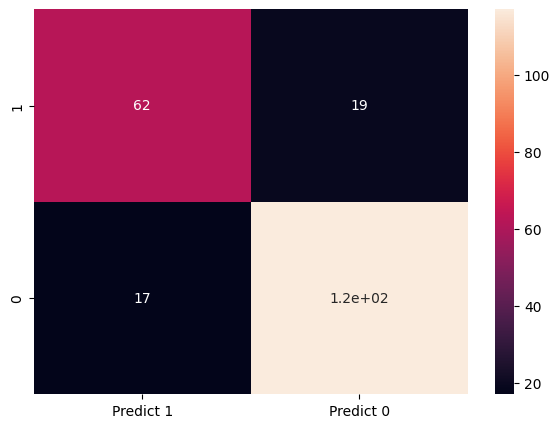

In [89]:
# Confusion Matrix after applying recommended hyper parameter value

y_predict = model.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Observations & Conclusion

1. The sex of passenger has a high correlation with Survival chances
2. Embarked also becomes a feature of interest as passengers embarking from port S  have a lower chance of survival.
3. Class also becomes a feature of interest as passengers in upper class  have a higher chance of survival.
4. Althogh Age does not show a strong correlation with Survival, it is an important feature, removing age from consideration reduces model accuracy.
5. Removing rows with null/NAN age value instead of replacing with mode gives better model accuracy
6. Both SVM and Decision tree provide a high model accuracy. SVMs tend to generalize better than decision trees, reducing the risk of overfitting. Hence SVM based model can be selected for deployment.

In [90]:
import joblib

joblib.dump(model, open('titanic_model.pkl','wb'))